<a href="https://colab.research.google.com/github/connectkishan1/Sentiment-Analysis-with-RNN/blob/master/Sentiment_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing Library & Loading Dataset


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/Dataset/sentiment.csv")
print("shape of df::",df.shape)
df.head()

shape of df:: (31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#Data preprations

In [ ]:
input1=df['tweet'] #tweet SUBDF taken as input from df & passes to input1
output1=df['label'] #label SUBDF taken as Output from df & passes to output1
print("input1 shape::",input1.shape)
print("print input1...\n ",input1)

input1 shape:: (31962,)
print input1...
  0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object


In [ ]:
#taking only words from input1 & passing to input2
input2=input1.replace("\W"," ",regex=True)

print("input2 contains words only::\n\n",input2)

input2 contains words only::

 0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
31957    ate  user isz that youuu ð   ð   ð   ð   ð   ð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     user  sikh  temple vandalised in in  calgary ...
31961                     thank you  user for you follow  
Name: tweet, Length: 31962, dtype: object


In [ ]:
#This class allows to vectorize a text corpus, 
#by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector.
from tensorflow.keras.preprocessing.text import Tokenizer

#num_words: the maximum number of words to keep,
#based on word frequency. Only the most common `num_words-1` words will be kept.
max_words=5000
tokenizer_obj = Tokenizer(num_words=max_words)

#Updates internal vocabulary based on a list of texts.
#In the case where texts contains lists, we assume each entry of the lists to be a token
#Required before using texts_to_sequences or texts_to_matrix.
tokenizer_obj.fit_on_texts(input2) 


In [ ]:
#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
input2_train, input2_test, output1_train, output1_test = train_test_split(input2, output1, test_size=0.30)

#Only top num_words-1 most frequent words will be taken into account.
#Only words known by the tokenizer will be taken into account.
input3_train = tokenizer_obj.texts_to_sequences(input2_train) 
input3_test = tokenizer_obj.texts_to_sequences(input2_test)

print(input3_train[2])
print(input3_test[2])


[1, 326, 3328, 68, 27, 110, 4, 252, 15, 52, 24, 16, 108, 68, 122, 2436, 3127, 170, 1322, 19, 223, 678, 207, 224]
[175, 7, 1299, 11, 18, 23, 252, 97, 655]


In [ ]:
import numpy as np

input4_train =np.asarray(input3_train)
input4_test =np.asarray(input3_test)

print("input train shape::",input4_train.shape)
print("Shape of output2_train",output1_train.shape)

output2_train =np.asarray(output1_train)

#output1_train=output1_train.to_numpy()
output2_train_reshape =output2_train.reshape(output2_train.shape[0],1)
print("Shape of output2_train_reshape::",output2_train_reshape.shape)


input train shape:: (22373,)
Shape of output2_train (22373,)
Shape of output2_train_reshape:: (22373, 1)


Data preprocessing

In [ ]:
from keras.preprocessing import sequence

maxlen=30

#sequence.pad_sequences-This function transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps).
#num_timesteps is either the maxlen argument if provided, or the length of the longest sequence otherwise.
x_train = sequence.pad_sequences(input4_train, maxlen=maxlen)
x_test = sequence.pad_sequences(input4_test, maxlen=maxlen)

print(x_train[1])
print("shape of x_train::",x_train.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    3 1816  530   12   24   61 4780   22  722  460   62  190    1
 3427 1738]
shape of x_train:: (22373, 30)


# RNN Mode

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM
from keras.layers import GRU,Dense,Dropout
#from keras.layers import  recurrent_dropout

#all the adding related to sequential
#Optionally, the first layer can receive an `input_shape` argument:
model = Sequential()
"""EMBEDDING:-
extracting the unique set of words
This layer can only be used as the first layer in a model.
Turns positive integers (indexes) into dense vectors of fixed size"""
model.add(Embedding(5000, 128, input_length=30))


model.add(LSTM(128, dropout=0.2,recurrent_dropout=0.2))

#model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))

#last layer will be dense t.e output
model.add(Dense(1, activation='sigmoid'))

#try using different optimizers and different optimizer configs


#Compile the Keras model to configure the training process:
#metrics_names-Returns the model's display labels for all outputs.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 128)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________
None


*Accuracy*-96%    *Loss*-0.12 batch_size=300, epochs=2

model.add(Embedding(15000, 128, input_length=100))
model.add(LSTM(128, dropout=0.2,recurrent_dropout=0.2))

*Accuracy*-96%    *Loss*-0.12  batch_size=300, epochs=2

model.add(Embedding(15000, 128, input_length=100))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))

*Accuracy*-96%    *Loss*-0.12  batch_size=300, epochs=2

model.add(Embedding(5000, 128, input_length=100))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))

*Accuracy*-96%    *Loss*-0.12  batch_size=300, epochs=2

model.add(Embedding(5000, 128, input_length=30))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))

*Accuracy*-95%    *Loss*-0.23  batch_size=30, epochs=10

model.add(Embedding(5000, 128, input_length=30))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))






# Model Training

In [ ]:
#This builds the model for the first time:

history=model.fit(x_train,output2_train_reshape, verbose=1, batch_size=30, epochs=10,validation_split=0.10)


Train on 20135 samples, validate on 2238 samples
Epoch 1/10
20135/20135 [==============================] - 39s 2ms/step - loss: 0.1739 - acc: 0.9435 - val_loss: 0.1350 - val_acc: 0.9531
Epoch 2/10
20135/20135 [==============================] - 37s 2ms/step - loss: 0.0931 - acc: 0.9684 - val_loss: 0.1247 - val_acc: 0.9558
Epoch 3/10
20135/20135 [==============================] - 37s 2ms/step - loss: 0.0677 - acc: 0.9767 - val_loss: 0.1346 - val_acc: 0.9504
Epoch 4/10
20135/20135 [==============================] - 37s 2ms/step - loss: 0.0516 - acc: 0.9819 - val_loss: 0.1450 - val_acc: 0.9544
Epoch 5/10
20135/20135 [==============================] - 36s 2ms/step - loss: 0.0359 - acc: 0.9885 - val_loss: 0.1609 - val_acc: 0.9500
Epoch 6/10
20135/20135 [==============================] - 36s 2ms/step - loss: 0.0277 - acc: 0.9911 - val_loss: 0.1825 - val_acc: 0.9517
Epoch 7/10
20135/20135 [==============================] - 36s 2ms/step - loss: 0.0201 - acc: 0.9933 - val_loss: 0.2232 - val_acc:

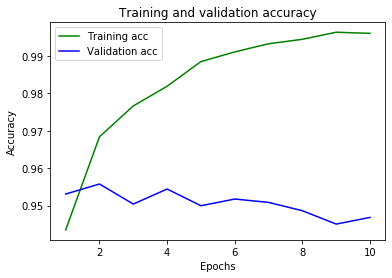

In [ ]:
#VALIDATION ACCURACY curves
import matplotlib.pyplot as plt
plt.clf()
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = range(1, (len(history.history['acc']) + 1))
plt.plot(epochs, acc_values, 'g', label='Training ')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation

In [ ]:
loss, acc = model.evaluate(x_test, output1_test, batch_size=30)
print('Test Error:', loss)
print('Test accuracy:', acc)

9589/9589 [==============================] - 6s 594us/step
Test Error: 0.30478128577790004
Test accuracy: 0.9478569083224249


# Prediction

In [ ]:
pred = model.predict_classes(x_test, verbose=0)
print(pred)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Confusion_matrix, Classification_report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n\n\nConfusion Matrix")
#labels=np.argmax(output1_test, axis=1)  #
#print(labels.shape)
print(pred.shape)
print(confusion_matrix(output1_test,pred))

print("\n\n\nClassification Report")
print(classification_report(output1_test,pred))




Confusion Matrix
(9589, 1)
[[8715  211]
 [ 289  374]]



Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8926
           1       0.64      0.56      0.60       663

    accuracy                           0.95      9589
   macro avg       0.80      0.77      0.79      9589
weighted avg       0.95      0.95      0.95      9589

